<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4 - West Nile Virus Prediction

# Part 2 : EDA

## Contents:
* [Organisation of Notebooks](#Organisation-of-Notebooks)
* [Import Libraries and Dataset](#Import-Libraries-and-Dataset)
* [Data Cleaning and Processing](#Data-Cleaning-and-Processing)
* [EDA](#EDA)
* [Summary](#Summary)

## Organistation of Notebooks:
1. [Introduction](./01_Introduction.ipynb)
2. EDA
3. [Model Evaluation](./03_Model_Evaluation.ipynb)
4. [Recommendation and Conclusion](./04_Recommendation_and_Conclusion.ipynb)

## Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
spray = pd.read_csv("../data/spray.csv")
weather = pd.read_csv("../data/weather.csv")

In [4]:
# load the map data, should be array of pixels
mapdata = np.loadtxt("../data/mapdata_copyright_openstreetmap_contributors.txt")

## Data Cleaning and Processing

### Train Dataset

#### Check for null or missing data

In [5]:
train.isna().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [6]:
train.isin(['M', '  T', '-']).sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [8]:
train['Date'] = pd.to_datetime(train['Date'])

#### Check datatypes

In [9]:
train.dtypes

Date                      datetime64[ns]
Address                           object
Species                           object
Block                              int64
Street                            object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object

### Spray Dataset

#### Check for null and missing value

In [10]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [11]:
spray[spray['Time'].isna()].head()

Date Time   Latitude  Longitude
1030  2011-09-07  NaN  41.987092 -87.794286
1031  2011-09-07  NaN  41.987620 -87.794382
1032  2011-09-07  NaN  41.988004 -87.794574
1033  2011-09-07  NaN  41.988292 -87.795486
1034  2011-09-07  NaN  41.988100 -87.796014

In [12]:
spray.isna().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [13]:
spray.isin(['M']).sum()

Date         0
Time         0
Latitude     0
Longitude    0
dtype: int64

In [14]:
spray['Date'] = pd.to_datetime(spray['Date'])

In [15]:
# .dt.time becomes a str
spray['Time'] = pd.to_datetime(spray['Time']).dt.time

In [16]:
spray.isna().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [17]:
time_impute = spray['Time'].mode()[0]

In [18]:
print(time_impute)

19:44:32


#### Spray dataframe with impute value and Spray data with columns drop; Do EDA with both

In [19]:
spray_drop = spray.dropna()
spray_impute = spray
spray_impute['Time'] = spray_impute['Time'].fillna(time_impute) # impute with mode

> <font size = 3 color = "crimson"> If you want to create a copy of the dataframe, use spray_impute = spray.copy() instead</font>

In [20]:
spray_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14835 non-null  datetime64[ns]
 1   Time       14835 non-null  object        
 2   Latitude   14835 non-null  float64       
 3   Longitude  14835 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 463.7+ KB


In [21]:
spray_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14251 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14251 non-null  datetime64[ns]
 1   Time       14251 non-null  object        
 2   Latitude   14251 non-null  float64       
 3   Longitude  14251 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 556.7+ KB


#### Check again for missing data and datatypes

In [22]:
spray_impute.isna().sum()

Date         0
Time         0
Latitude     0
Longitude    0
dtype: int64

In [23]:
spray_drop.isna().sum()

Date         0
Time         0
Latitude     0
Longitude    0
dtype: int64

In [24]:
spray.dtypes

Date         datetime64[ns]
Time                 object
Latitude            float64
Longitude           float64
dtype: object

In [25]:
spray_impute.dtypes

Date         datetime64[ns]
Time                 object
Latitude            float64
Longitude           float64
dtype: object

In [26]:
spray_drop.dtypes

Date         datetime64[ns]
Time                 object
Latitude            float64
Longitude           float64
dtype: object

### Weather Dataset

#### Check for null or missing data

In [27]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [28]:
weather.isna().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [29]:
weather.isin(['M', '  T', '-']).sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg             11
Depart         1472
DewPoint          0
WetBulb           4
Heat             11
Cool             11
Sunrise        1472
Sunset         1472
CodeSum           0
Depth          1472
Water1         2944
SnowFall       1484
PrecipTotal     320
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

In [30]:
weather.loc[weather['PrecipTotal'].isin(['M', '  T', '-'])].head()

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
6         1  2007-05-04    66    49   58      4        41      50    7    0   
8         1  2007-05-05    66    53   60      5        38      49    5    0   
9         2  2007-05-05    66    54   60      M        39      50    5    0   
12        1  2007-05-07    83    47   65     10        41      54    0    0   
15        2  2007-05-08    80    60   70      M        57      63    0    5   

   Sunrise Sunset CodeSum Depth Water1 SnowFall PrecipTotal StnPressure  \
6     0444   1852      RA     0      M      0.0           T       29.31   
8     0443   1853             0      M      0.0           T       29.40   
9        -      -             M      M        M           T       29.46   
12    0441   1856      RA     0      M      0.0           T       29.38   
15       -      -      HZ     M      M        M           T       29.36   

   SeaLevel  ResultSpeed  ResultDir AvgSpeed  
6     30.05         10.4          8     10.8  
8     30.10         11.7          7     12.0  
9     30.09         11.2          7     11.5  
12    30.12          8.6         18     10.5  
15    30.02          2.5          8      5.4

In [31]:
weather.loc[weather['Tavg'].isin(['M', '  T', '-'])]

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
7           2  2007-05-04    78    51    M      M        42      50    M    M   
505         2  2008-07-08    86    46    M      M        68      71    M    M   
675         2  2008-10-01    62    46    M      M        41      47    M    M   
1637        2  2011-07-22   100    71    M      M        70      74    M    M   
2067        2  2012-08-22    84    72    M      M        51      61    M    M   
2211        2  2013-05-02    71    42    M      M        39      45    M    M   
2501        2  2013-09-24    91    52    M      M        48      54    M    M   
2511        2  2013-09-29    84    53    M      M        48      54    M    M   
2525        2  2013-10-06    76    48    M      M        44      50    M    M   
2579        2  2014-05-02    80    47    M      M        43      47    M    M   
2811        2  2014-08-26    86    49    M      M        68      71    M    M   

     Sunrise Sunset     CodeSum Depth Water1 SnowFall PrecipTotal StnPressure  \
7          -      -                 M      M        M        0.00       29.36   
505        -      -       TS RA     M      M        M        0.28       29.16   
675        -      -                 M      M        M        0.00       29.30   
1637       -      -  TS TSRA BR     M      M        M        0.14       29.23   
2067       -      -                 M      M        M        0.00       29.39   
2211       -      -                 M      M        M        0.00       29.51   
2501       -      -                 M      M        M        0.00       29.33   
2511       -      -       RA BR     M      M        M        0.22       29.36   
2525       -      -    RA DZ BR     M      M        M        0.06       29.10   
2579       -      -          RA     M      M        M        0.04       29.10   
2811       -      -                 M      M        M           T       29.41   

     SeaLevel  ResultSpeed  ResultDir AvgSpeed  
7       30.04         10.1          7     10.4  
505     29.80          7.4         24      8.3  
675     29.96         10.9         33     11.0  
1637    29.86          3.8         10      8.2  
2067        M          4.7         19        M  
2211    30.17         15.8          2     16.1  
2501    30.00          5.8          9      7.7  
2511    30.01          6.3         36      7.8  
2525    29.76         10.1         25     10.6  
2579    29.79         10.7         23     11.9  
2811    30.04          1.3         15      5.8

In [32]:
weather.loc[weather['WetBulb'].isin(['M', '  T', '-'])]

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
848         1  2009-06-26    86    69   78      7        60       M    0   13   
2410        1  2013-08-10    81    64   73      0        57       M    0    8   
2412        1  2013-08-11    81    60   71     -2        61       M    0    6   
2415        2  2013-08-12    85    69   77      M        63       M    0   12   

     Sunrise Sunset CodeSum Depth Water1 SnowFall PrecipTotal StnPressure  \
848     0418   1931             0      M      0.0        0.00           M   
2410    0454   1900             0      M      0.0        0.00           M   
2412    0455   1859      RA     0      M      0.0        0.01       29.35   
2415       -      -      RA     M      M        M        0.66       29.27   

     SeaLevel  ResultSpeed  ResultDir AvgSpeed  
848     29.85          6.4          4      8.2  
2410    30.08          5.3          5      6.5  
2412    30.07          2.0         27      3.0  
2415    29.92          4.5         26      7.7

In [33]:
weather['Date'] = pd.to_datetime(weather['Date'])

#### Get only the useful columns

Columns like Depth, Snowfall, Water, Sunrise and Sunset were dropped as there were more than 50% missing data and we feel that there features are not relevant according to the description in the pdf file.

Columns like Heat and Cool which are related to temperature so we also drop them as we can make use of the Tavg, Tmin and Tmax features.

Columns like StnPressure, SeaLevel are dropped as we feel that the air pressure is more relevant for aircraft and not for mosquitos.

Columns like ResultSpeed, ResultDir, AvgSpeed are wind related condition which we also feel that it is more relevant for aircraft and not mosquitos.

> <font size = 3 color = "crimson"> Another way to assess if the features are going to be useful, would be to do EDA/ plots of weather features and num of mosquitoes/ wmv positive cases by time..</font>

In [34]:
filtered_cols = ['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'PrecipTotal']

In [35]:
weather_filtered = weather[filtered_cols]

In [36]:
weather_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   object        
 5   DewPoint     2944 non-null   int64         
 6   WetBulb      2944 non-null   object        
 7   PrecipTotal  2944 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 184.1+ KB


#### Change datatype from Object to Float for Tavg, WetBulb and PrecipTotal; Replace with 0 if there is missing data

In [37]:
# weather_filtered['Tavg'].map(lambda x: weather_filtered['Tmin'][x.index]).head()
weather_filtered['Tavg'] = weather_filtered['Tavg'].map(lambda x: float(x) if x not in ['M', '  T', '-'] else 0)
weather_filtered['WetBulb'] = weather_filtered['WetBulb'].map(lambda x: float(x) if x not in ['M', '  T', '-'] else 0)
weather_filtered['PrecipTotal'] = weather_filtered['PrecipTotal'].map(lambda x: float(x) if x not in ['M', '  T', '-'] else 0)

<ipython-input-37-bc4e6e358fda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_filtered['Tavg'] = weather_filtered['Tavg'].map(lambda x: float(x) if x not in ['M', '  T', '-'] else 0)
<ipython-input-37-bc4e6e358fda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_filtered['WetBulb'] = weather_filtered['WetBulb'].map(lambda x: float(x) if x not in ['M', '  T', '-'] else 0)
<ipython-input-37-bc4e6e358fda>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

#### Impute values of Tavg using Tmin and Tmax

##### Function to return Tavg using Tmin and Tmax

In [38]:
def impute_tavg(row):
    return (row['Tmin'] + row['Tmax']) / 2

In [39]:
weather_filtered['Tavg'] = weather_filtered.apply(lambda row: impute_tavg(row), axis=1)

<ipython-input-39-470f2e47dfb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_filtered['Tavg'] = weather_filtered.apply(lambda row: impute_tavg(row), axis=1)


In [40]:
weather_filtered.head()

Station       Date  Tmax  Tmin  Tavg  DewPoint  WetBulb  PrecipTotal
0        1 2007-05-01    83    50  66.5        51     56.0          0.0
1        2 2007-05-01    84    52  68.0        51     57.0          0.0
2        1 2007-05-02    59    42  50.5        42     47.0          0.0
3        2 2007-05-02    60    43  51.5        42     47.0          0.0
4        1 2007-05-03    66    46  56.0        40     48.0          0.0

#### Impute WetBulb Using Previous and Next day

In [41]:
weather_filtered.loc[weather_filtered['WetBulb'] == 0 , ['Date', 'Station', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'PrecipTotal']].head(10)

Date  Station  Tmax  Tmin  Tavg  DewPoint  WetBulb  PrecipTotal
848  2009-06-26        1    86    69  77.5        60      0.0         0.00
2410 2013-08-10        1    81    64  72.5        57      0.0         0.00
2412 2013-08-11        1    81    60  70.5        61      0.0         0.01
2415 2013-08-12        2    85    69  77.0        63      0.0         0.66

##### Function to impute WetBulb

In [42]:
def impute_webulb(df, col):
    lead = f'{col}_lead' # column name for df
    lag = f'{col}_lag' # column name for df
    df[lag] = df[col].shift(2) # get previous day
    df[lead] = df[col].shift(-2) # get the next day
    index_list = df.loc[df[col] == 0, :].index.to_list() # save the index to list
    for index in index_list:
        if df[lead][index] != 0 and df[lag][index] != 0:
            df[col][index] = (df[lead][index]+df[lag][index])/2
        else:
            df[col][index] = max(df[lead][index], df[lag][index])

> <font size = 3 color = "crimson"> When imputing data, do be mindful not to impute using data from the future.</font>

In [43]:
impute_webulb(weather_filtered, 'WetBulb')

<ipython-input-42-9a88397a5472>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[lag] = df[col].shift(2) # get previous day
<ipython-input-42-9a88397a5472>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[lead] = df[col].shift(-2) # get the next day
<ipython-input-42-9a88397a5472>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [44]:
weather_filtered['WetBulb'].unique()

array([56. , 57. , 47. , 48. , 50. , 49. , 46. , 54. , 53. , 62. , 63. ,
       60. , 61. , 51. , 59. , 58. , 43. , 44. , 45. , 65. , 66. , 67. ,
       64. , 52. , 55. , 69. , 68. , 70. , 72. , 71. , 73. , 74. , 76. ,
       42. , 39. , 40. , 41. , 35. , 33. , 34. , 75. , 36. , 32. , 38. ,
       78. , 77. , 37. , 60.5])

#### Merge Dataset

##### Check for the max, min for Latitude and Longitude for Train dataset to check if we can use the avg weather forecast from the 2 stations

In [45]:
# Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
# Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level
max(train['Latitude']), min(train['Latitude']), max(train['Longitude']), min(train['Longitude'])

(42.01743, 41.644612, -87.531635, -87.930995)

Since the 2 Station for weather forecast is witin the max and min Latitude and Longitude of Train dataset, we take the avg from the 2 stations

##### Take the avg of Station 1 and 2 to merge with train dataset and remove the Station column

In [46]:
weather_to_merge = weather_filtered.groupby(['Date'])[['Station', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'PrecipTotal']].mean().reset_index(drop=False)

In [47]:
weather_to_merge = weather_to_merge.drop(columns='Station')

In [48]:
weather_to_merge.head()

Date  Tmax  Tmin   Tavg  DewPoint  WetBulb  PrecipTotal
0 2007-05-01  83.5  51.0  67.25      51.0     56.5          0.0
1 2007-05-02  59.5  42.5  51.00      42.0     47.0          0.0
2 2007-05-03  66.5  47.0  56.75      40.0     49.0          0.0
3 2007-05-04  72.0  50.0  61.00      41.5     50.0          0.0
4 2007-05-05  66.0  53.5  59.75      38.5     49.5          0.0

#### Lag weather data

In [49]:
def lag_features(df, index, start, end, features_list):

    if type(features_list) != list:
        raise Exception("Please include a list of features")
    else:
#         df.set_index
        df.set_index(index, inplace=True)
        df.sort_index(ascending = True, inplace = True)
        for feature in features_list:
            for day in range(start, end+1):
                df[f'{feature}_lag{day}'] = df[feature].shift(day)
    return df

In [50]:
weather_to_merge = lag_features(weather_to_merge, 'Date', 1, 7, ['Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'PrecipTotal'])

In [51]:
weather_to_merge.head()

Tmax  Tmin   Tavg  DewPoint  WetBulb  PrecipTotal  Tmax_lag1  \
Date                                                                       
2007-05-01  83.5  51.0  67.25      51.0     56.5          0.0        NaN   
2007-05-02  59.5  42.5  51.00      42.0     47.0          0.0       83.5   
2007-05-03  66.5  47.0  56.75      40.0     49.0          0.0       59.5   
2007-05-04  72.0  50.0  61.00      41.5     50.0          0.0       66.5   
2007-05-05  66.0  53.5  59.75      38.5     49.5          0.0       72.0   

            Tmax_lag2  Tmax_lag3  Tmax_lag4  Tmax_lag5  Tmax_lag6  Tmax_lag7  \
Date                                                                           
2007-05-01        NaN        NaN        NaN        NaN        NaN        NaN   
2007-05-02        NaN        NaN        NaN        NaN        NaN        NaN   
2007-05-03       83.5        NaN        NaN        NaN        NaN        NaN   
2007-05-04       59.5       83.5        NaN        NaN        NaN        NaN   
2007-05-05       66.5       59.5       83.5        NaN        NaN        NaN   

            Tmin_lag1  Tmin_lag2  Tmin_lag3  Tmin_lag4  Tmin_lag5  Tmin_lag6  \
Date                                                                           
2007-05-01        NaN        NaN        NaN        NaN        NaN        NaN   
2007-05-02       51.0        NaN        NaN        NaN        NaN        NaN   
2007-05-03       42.5       51.0        NaN        NaN        NaN        NaN   
2007-05-04       47.0       42.5       51.0        NaN        NaN        NaN   
2007-05-05       50.0       47.0       42.5       51.0        NaN        NaN   

            Tmin_lag7  Tavg_lag1  Tavg_lag2  Tavg_lag3  Tavg_lag4  Tavg_lag5  \
Date                                                                           
2007-05-01        NaN        NaN        NaN        NaN        NaN        NaN   
2007-05-02        NaN      67.25        NaN        NaN        NaN        NaN   
2007-05-03        NaN      51.00      67.25        NaN        NaN        NaN   
2007-05-04        NaN      56.75      51.00      67.25        NaN        NaN   
2007-05-05        NaN      61.00      56.75      51.00      67.25        NaN   

            Tavg_lag6  Tavg_lag7  DewPoint_lag1  DewPoint_lag2  DewPoint_lag3  \
Date                                                                            
2007-05-01        NaN        NaN            NaN            NaN            NaN   
2007-05-02        NaN        NaN           51.0            NaN            NaN   
2007-05-03        NaN        NaN           42.0           51.0            NaN   
2007-05-04        NaN        NaN           40.0           42.0           51.0   
2007-05-05        NaN        NaN           41.5           40.0           42.0   

            DewPoint_lag4  DewPoint_lag5  DewPoint_lag6  DewPoint_lag7  \
Date                                                                     
2007-05-01            NaN            NaN            NaN            NaN   
2007-05-02            NaN            NaN            NaN            NaN   
2007-05-03            NaN            NaN            NaN            NaN   
2007-05-04            NaN            NaN            NaN            NaN   
2007-05-05           51.0            NaN            NaN            NaN   

            WetBulb_lag1  WetBulb_lag2  WetBulb_lag3  WetBulb_lag4  \
Date                                                                 
2007-05-01           NaN           NaN           NaN           NaN   
2007-05-02          56.5           NaN           NaN           NaN   
2007-05-03          47.0          56.5           NaN           NaN   
2007-05-04          49.0          47.0          56.5           NaN   
2007-05-05          50.0          49.0          47.0          56.5   

            WetBulb_lag5  WetBulb_lag6  WetBulb_lag7  PrecipTotal_lag1  \
Date                                                                     
2007-05-01           NaN           NaN           NaN               NaN

#### Check again for missing data and datatypes

In [52]:
# weather_filtered.loc[:, ['Tavg', 'DewPoint', 'PrecipTotal']].head(10)
weather_to_merge.isin(['M']).sum()

Tmax                0
Tmin                0
Tavg                0
DewPoint            0
WetBulb             0
PrecipTotal         0
Tmax_lag1           0
Tmax_lag2           0
Tmax_lag3           0
Tmax_lag4           0
Tmax_lag5           0
Tmax_lag6           0
Tmax_lag7           0
Tmin_lag1           0
Tmin_lag2           0
Tmin_lag3           0
Tmin_lag4           0
Tmin_lag5           0
Tmin_lag6           0
Tmin_lag7           0
Tavg_lag1           0
Tavg_lag2           0
Tavg_lag3           0
Tavg_lag4           0
Tavg_lag5           0
Tavg_lag6           0
Tavg_lag7           0
DewPoint_lag1       0
DewPoint_lag2       0
DewPoint_lag3       0
DewPoint_lag4       0
DewPoint_lag5       0
DewPoint_lag6       0
DewPoint_lag7       0
WetBulb_lag1        0
WetBulb_lag2        0
WetBulb_lag3        0
WetBulb_lag4        0
WetBulb_lag5        0
WetBulb_lag6        0
WetBulb_lag7        0
PrecipTotal_lag1    0
PrecipTotal_lag2    0
PrecipTotal_lag3    0
PrecipTotal_lag4    0
PrecipTota

In [53]:
weather_to_merge.isin(['. T']).sum()

Tmax                0
Tmin                0
Tavg                0
DewPoint            0
WetBulb             0
PrecipTotal         0
Tmax_lag1           0
Tmax_lag2           0
Tmax_lag3           0
Tmax_lag4           0
Tmax_lag5           0
Tmax_lag6           0
Tmax_lag7           0
Tmin_lag1           0
Tmin_lag2           0
Tmin_lag3           0
Tmin_lag4           0
Tmin_lag5           0
Tmin_lag6           0
Tmin_lag7           0
Tavg_lag1           0
Tavg_lag2           0
Tavg_lag3           0
Tavg_lag4           0
Tavg_lag5           0
Tavg_lag6           0
Tavg_lag7           0
DewPoint_lag1       0
DewPoint_lag2       0
DewPoint_lag3       0
DewPoint_lag4       0
DewPoint_lag5       0
DewPoint_lag6       0
DewPoint_lag7       0
WetBulb_lag1        0
WetBulb_lag2        0
WetBulb_lag3        0
WetBulb_lag4        0
WetBulb_lag5        0
WetBulb_lag6        0
WetBulb_lag7        0
PrecipTotal_lag1    0
PrecipTotal_lag2    0
PrecipTotal_lag3    0
PrecipTotal_lag4    0
PrecipTota

In [54]:
weather_to_merge.dtypes

Tmax                float64
Tmin                float64
Tavg                float64
DewPoint            float64
WetBulb             float64
PrecipTotal         float64
Tmax_lag1           float64
Tmax_lag2           float64
Tmax_lag3           float64
Tmax_lag4           float64
Tmax_lag5           float64
Tmax_lag6           float64
Tmax_lag7           float64
Tmin_lag1           float64
Tmin_lag2           float64
Tmin_lag3           float64
Tmin_lag4           float64
Tmin_lag5           float64
Tmin_lag6           float64
Tmin_lag7           float64
Tavg_lag1           float64
Tavg_lag2           float64
Tavg_lag3           float64
Tavg_lag4           float64
Tavg_lag5           float64
Tavg_lag6           float64
Tavg_lag7           float64
DewPoint_lag1       float64
DewPoint_lag2       float64
DewPoint_lag3       float64
DewPoint_lag4       float64
DewPoint_lag5       float64
DewPoint_lag6       float64
DewPoint_lag7       float64
WetBulb_lag1        float64
WetBulb_lag2        

## EDA

### Train dataset

In [55]:
train_filtered = train.loc[:, ['Date', 'Species', 'Trap', 'Longitude', 'Latitude', 'NumMosquitos', 'WnvPresent']]

In [56]:
train_filtered.head()

Date                 Species  Trap  Longitude   Latitude  \
0 2007-05-29  CULEX PIPIENS/RESTUANS  T002 -87.800991  41.954690   
1 2007-05-29          CULEX RESTUANS  T002 -87.800991  41.954690   
2 2007-05-29          CULEX RESTUANS  T007 -87.769279  41.994991   
3 2007-05-29  CULEX PIPIENS/RESTUANS  T015 -87.824812  41.974089   
4 2007-05-29          CULEX RESTUANS  T015 -87.824812  41.974089   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
2             1           0  
3             1           0  
4             4           0

In [57]:
wnv_train = train_filtered.drop_duplicates(subset=['Longitude', 'Latitude', 'WnvPresent'])

In [58]:
traps_train = train_filtered.drop_duplicates(subset=['Longitude', 'Latitude',])

#### Plot location to see if wnv is present

/Users/jpschew/opt/anaconda3/envs/dsi24/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


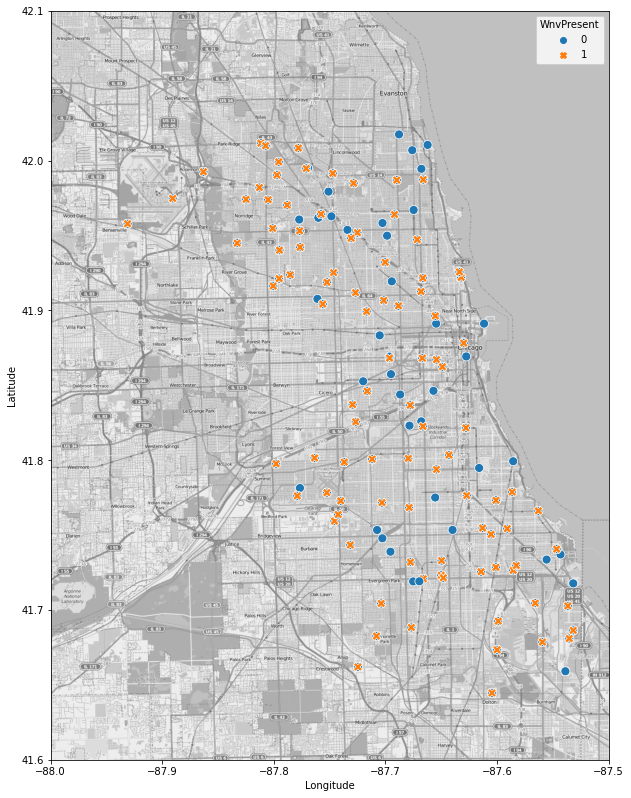

In [59]:
# aspect -> get the aspect ratio of image
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]

# extentfloats (left, right, bottom, top), optional
# The bounding box in data coordinates that the image will fill. 
# The image is stretched individually along x and y to fill the box
lon_lat_box = (-88, -87.5, 41.6, 42.1)

# aspect -> get the aspect ratio of image
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]

# extentfloats (left, right, bottom, top), optional
# The bounding box in data coordinates that the image will fill. 
# The image is stretched individually along x and y to fill the box
lon_lat_box = (-88, -87.5, 41.6, 42.1)

fig = plt.figure(figsize=(10,14))
ax1 = fig.add_subplot(111)
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           origin='upper', 
           aspect=aspect)

sns.scatterplot(
    wnv_train['Longitude'],
    wnv_train['Latitude'],
#     markers='x',
    style=wnv_train['WnvPresent'],
    hue=wnv_train['WnvPresent'],
    s=80,
    ax=ax1
#     origin='upper'
);

# ax1.legend();

#### Check which species contribute to WNV

In [60]:
mosquito_train = train_filtered.drop_duplicates(subset=['Species', 'Longitude', 'Latitude', 'WnvPresent']) 
# Date', 'Species', 'Trap', 'Longitude', 'Latitude', 'NumMosquitos', 'WnvPresent'

In [61]:
mosquito_train.head()

Date                 Species  Trap  Longitude   Latitude  \
0 2007-05-29  CULEX PIPIENS/RESTUANS  T002 -87.800991  41.954690   
1 2007-05-29          CULEX RESTUANS  T002 -87.800991  41.954690   
2 2007-05-29          CULEX RESTUANS  T007 -87.769279  41.994991   
3 2007-05-29  CULEX PIPIENS/RESTUANS  T015 -87.824812  41.974089   
4 2007-05-29          CULEX RESTUANS  T015 -87.824812  41.974089   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
2             1           0  
3             1           0  
4             4           0

In [62]:
mosquito_df = pd.DataFrame(mosquito_train.groupby(['Species', 'WnvPresent'])['NumMosquitos'].sum()).reset_index()

In [63]:
mosquito_df

Species  WnvPresent  NumMosquitos
0         CULEX ERRATICUS           0             7
1           CULEX PIPIENS           0           588
2           CULEX PIPIENS           1          1824
3  CULEX PIPIENS/RESTUANS           0           850
4  CULEX PIPIENS/RESTUANS           1          1895
5          CULEX RESTUANS           0           493
6          CULEX RESTUANS           1           324
7        CULEX SALINARIUS           0            68
8          CULEX TARSALIS           0             7
9         CULEX TERRITANS           0           106

In [64]:
# plot in desc order
my_order = mosquito_df.sort_values(by='NumMosquitos', ascending=False).drop_duplicates(subset=['Species'])['Species']

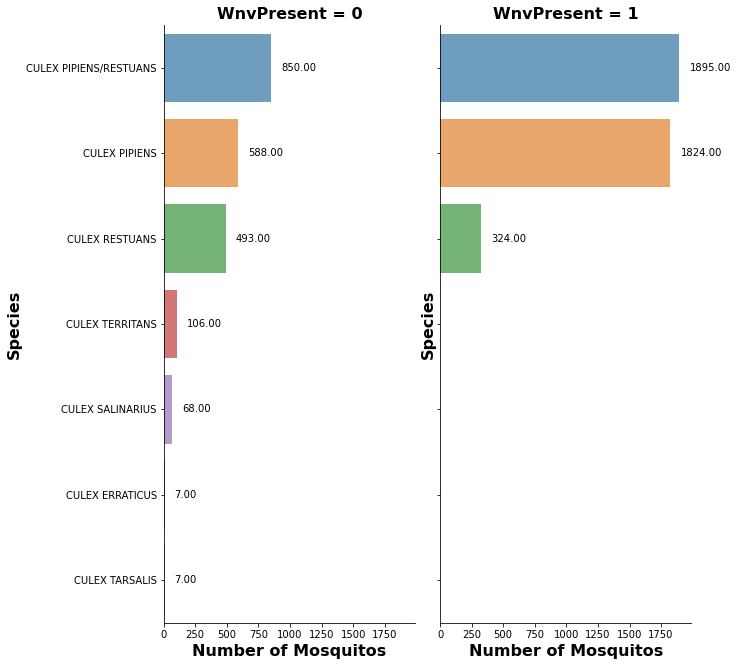

In [65]:
# plt.figure(figsize=(12,12))
g = sns.FacetGrid(mosquito_df, col='WnvPresent')#, row="Species")
g.map(sns.barplot, 'NumMosquitos', 'Species',  alpha=.7, ci=None , orient='h', \
      order=my_order,#['CULEX ERRATICUS', 'CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TARSALIS', 'CULEX TERRITANS'], \
      palette=sns.color_palette("tab10"))
for ax in g.axes.ravel():
  ax.set_title(ax.get_title(), fontsize='16', fontweight='bold')
  ax.set_ylabel('Species', fontsize='16', fontweight='bold')
  ax.set_xlabel('Number of Mosquitos', fontsize='16', fontweight='bold')
  for p in ax.patches:
    # ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points') # vertical
    ax.annotate(format(p.get_width(), '.2f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha = 'left', va = 'center', xytext = (10, 0), textcoords = 'offset points') # horizontal
g.fig.set_figwidth(12)
g.fig.set_figheight(12)
g.fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)
g.add_legend()

Seem that 3 mosquito species affect an area with wnv.

In [66]:
mosquito_wnv_present = mosquito_train.loc[((mosquito_train['Species'] == 'CULEX PIPIENS/RESTUANS') | (mosquito_train['Species'] == 'CULEX PIPIENS') | (mosquito_train['Species'] == 'CULEX RESTUANS')) & (mosquito_train['WnvPresent'] == 1), :]

### Spray Dataset

In [67]:
spray_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14251 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14251 non-null  datetime64[ns]
 1   Time       14251 non-null  object        
 2   Latitude   14251 non-null  float64       
 3   Longitude  14251 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 556.7+ KB


In [68]:
spray_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14835 non-null  datetime64[ns]
 1   Time       14835 non-null  object        
 2   Latitude   14835 non-null  float64       
 3   Longitude  14835 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 463.7+ KB


In [69]:
spray_drop_unique = spray_drop.drop_duplicates(subset=['Date', 'Time', 'Latitude', 'Longitude'])

In [70]:
spray_impute_unique = spray_impute.drop_duplicates(subset=['Date', 'Time', 'Latitude', 'Longitude'])

In [71]:
spray_impute.head()

Date      Time   Latitude  Longitude
0 2011-08-29  18:56:58  42.391623 -88.089163
1 2011-08-29  18:57:08  42.391348 -88.089163
2 2011-08-29  18:57:18  42.391022 -88.089157
3 2011-08-29  18:57:28  42.390637 -88.089158
4 2011-08-29  18:57:38  42.390410 -88.088858

In [72]:
spray_impute_loc = spray_drop.drop_duplicates(subset=['Latitude', 'Longitude'])

In [73]:
spray_impute_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13710 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       13710 non-null  datetime64[ns]
 1   Time       13710 non-null  object        
 2   Latitude   13710 non-null  float64       
 3   Longitude  13710 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 535.5+ KB


In [74]:
spray_drop.head()

Date      Time   Latitude  Longitude
0 2011-08-29  18:56:58  42.391623 -88.089163
1 2011-08-29  18:57:08  42.391348 -88.089163
2 2011-08-29  18:57:18  42.391022 -88.089157
3 2011-08-29  18:57:28  42.390637 -88.089158
4 2011-08-29  18:57:38  42.390410 -88.088858

In [75]:
spray_drop_loc = spray_drop.drop_duplicates(subset=['Latitude', 'Longitude'])

#### Drop outliners that is outside of the map data

In [76]:
# 95/13710 -> less than 1%
spray_drop_rm_outliers = spray_drop_loc.loc[spray_drop_loc['Latitude'] < 42.1, :]

In [77]:
len(spray_drop_rm_outliers)

13615

#### Plot the location of spray to check if it will reduce the WNV present

/Users/jpschew/opt/anaconda3/envs/dsi24/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jpschew/opt/anaconda3/envs/dsi24/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jpschew/opt/anaconda3/envs/dsi24/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

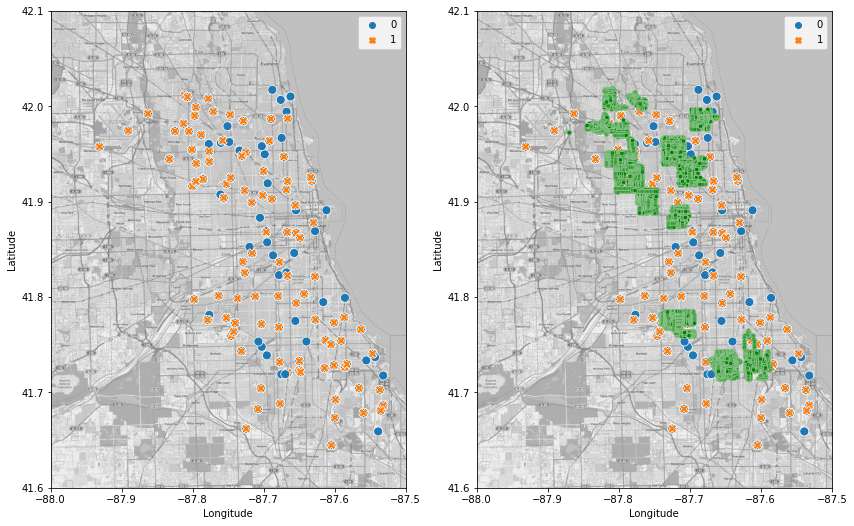

In [78]:
# aspect -> get the aspect ratio of image
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]

# extentfloats (left, right, bottom, top), optional
# The bounding box in data coordinates that the image will fill. 
# The image is stretched individually along x and y to fill the box
lon_lat_box = (-88, -87.5, 41.6, 42.1)

# aspect -> get the aspect ratio of image
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]

# extentfloats (left, right, bottom, top), optional
# The bounding box in data coordinates that the image will fill. 
# The image is stretched individually along x and y to fill the box
lon_lat_box = (-88, -87.5, 41.6, 42.1)

fig = plt.figure(figsize=(14, 20))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           origin='upper', 
           aspect=aspect)

sns.scatterplot(
    wnv_train['Longitude'],
    wnv_train['Latitude'],
#     markers='x',
    style=wnv_train['WnvPresent'],
    hue=wnv_train['WnvPresent'],
    s=80,
    ax=ax1
#     origin='upper'
);

ax2.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           origin='upper', 
           aspect=aspect)
sns.scatterplot(
    wnv_train['Longitude'],
    wnv_train['Latitude'],
#     markers='x',
    style=wnv_train['WnvPresent'],
    hue=wnv_train['WnvPresent'],
    s=80,
    ax=ax2
#     origin='upper'
);
sns.scatterplot(
    spray_drop_rm_outliers['Longitude'],
    spray_drop_rm_outliers['Latitude'],
#     markers='x',
    # style=traps_train['WnvPresent'],
    # hue=traps_train['WnvPresent'],
    s=20,
    ax=ax2,
    markers='s',
    color='g',
    legend='full',
    alpha=0.5
    # palette='Pastel1'
#     origin='upper'
)


ax1.legend()
ax2.legend();

> <font size = 3 color = "crimson"> Do elaborate on the visualizations above. Is the right subplot for the same timeframe or after spraying? </font>

In [79]:
mosquito_wnv_present.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 553 to 10501
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          193 non-null    datetime64[ns]
 1   Species       193 non-null    object        
 2   Trap          193 non-null    object        
 3   Longitude     193 non-null    float64       
 4   Latitude      193 non-null    float64       
 5   NumMosquitos  193 non-null    int64         
 6   WnvPresent    193 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 12.1+ KB


In [80]:
train['Trap'].unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

Seem like spraying does not have any effect. Spraying location still have wmv present. We will now analyse the effect of spraying on mosquitoes numbers

> <font size = 3 color = "crimson"> It is not clear how to arrive at this conclusion.  </font>

#### Effect of spraying on mosquitoes numbers

##### Preprocess the spray and train data before merging

In [81]:
spray_effect = spray.drop_duplicates().reset_index(drop=True)
spray_effect['Date'] = pd.to_datetime(spray_effect['Date'])
spray_effect.set_index('Date', inplace=True)

train_spray = train.drop_duplicates().reset_index(drop=True)
train_spray['Date'] = pd.to_datetime(train_spray['Date'])
train_spray.set_index('Date', inplace=True)

##### Merge the spray and train data for dates where spraying is available

In [82]:
train_spray = pd.concat([train_spray.loc['2011-08-29':'2011-09-30'], train_spray.loc['2013-07-17':'2013-09-30']])

In [83]:
# # code to install haversine package for use in the code cell below
# !conda install -c conda-forge haversine -y

In [84]:
# # Due to lengthy amount of time to run the following code, the resulting DataFrame has been saved as a csv

# for ind_tr, row_tr in train_spray.iterrows():
#   for ind_sp, row_sp in spray.iterrows():
#     if (0 <= (ind_tr - ind_sp).days <= 7) and hs.haversine((row_tr['Latitude'],row_tr['Longitude']),(row_sp['Latitude'],row_sp['Longitude']), unit=Unit.METERS)<=1000:
#         train_spray.loc[ind_tr, ind_sp.strftime('%Y-%m-%d')] = hs.haversine((row_tr['Latitude'],row_tr['Longitude']),(row_sp['Latitude'],row_sp['Longitude']), unit=Unit.METERS)

In [85]:
# We will now read in the csv for convenient instead of running the above code which will takae some time
train_spray = pd.read_csv('../data/train_spray.csv')

##### Create several DataFrames based on the spray dates and the corresponding traps that are within 1 km and 7 days of the spray event 

In [86]:
train_spray = train_spray.set_index('Date', drop=True)

In [87]:
sprayed130717 = train_spray[train_spray['2013-07-17'].notnull()][['Species', 
                                                                  'Trap', 
                                                                  'Latitude',
                                                                  'Longitude', 
                                                                  'AddressAccuracy', 
                                                                  'NumMosquitos', 
                                                                  'WnvPresent'
                                                                 ]].reset_index(
                ).groupby(['Date',
                           'Trap',
                           'Latitude', 
                           'Longitude']
                         )['Date',
                           'Species', 
                           'Trap',  
                           'NumMosquitos', 
                           'WnvPresent'
                          ].sum().reset_index()
sprayed130717['SprayDate'] = pd.to_datetime('2013-07-17')

<ipython-input-87-8d6c0665241f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sprayed130717 = train_spray[train_spray['2013-07-17'].notnull()][['Species',


In [88]:
sprayed130725 = train_spray[train_spray['2013-07-25'].notnull()][['Species', 
                                                                  'Trap', 
                                                                  'Latitude',
                                                                  'Longitude', 
                                                                  'AddressAccuracy', 
                                                                  'NumMosquitos', 
                                                                  'WnvPresent'
                                                                 ]].reset_index(
                ).groupby(['Date',
                           'Trap',
                           'Latitude', 
                           'Longitude']
                         )['Date',
                           'Species', 
                           'Trap',  
                           'NumMosquitos', 
                           'WnvPresent'
                          ].sum().reset_index()
sprayed130725['SprayDate'] = pd.to_datetime('2013-07-25')

<ipython-input-88-d570b9b4e0be>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sprayed130725 = train_spray[train_spray['2013-07-25'].notnull()][['Species',


In [89]:
sprayed130808 = train_spray[train_spray['2013-08-08'].notnull()][['Species', 
                                                                  'Trap', 
                                                                  'Latitude',
                                                                  'Longitude', 
                                                                  'AddressAccuracy', 
                                                                  'NumMosquitos', 
                                                                  'WnvPresent'
                                                                 ]].reset_index(
                ).groupby(['Date',
                           'Trap',
                           'Latitude', 
                           'Longitude']
                         )['Date',
                           'Species', 
                           'Trap',  
                           'NumMosquitos', 
                           'WnvPresent'
                          ].sum().reset_index()
sprayed130808['SprayDate'] = pd.to_datetime('2013-08-08')

<ipython-input-89-1d1e3d9bc891>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sprayed130808 = train_spray[train_spray['2013-08-08'].notnull()][['Species',


In [90]:
sprayed130815 = train_spray[train_spray['2013-08-15'].notnull()][['Species', 
                                                                  'Trap', 
                                                                  'Latitude',
                                                                  'Longitude', 
                                                                  'AddressAccuracy', 
                                                                  'NumMosquitos', 
                                                                  'WnvPresent'
                                                                 ]].reset_index(
                ).groupby(['Date',
                           'Trap',
                           'Latitude', 
                           'Longitude']
                         )['Date',
                           'Species', 
                           'Trap',  
                           'NumMosquitos', 
                           'WnvPresent'
                          ].sum().reset_index()
sprayed130815['SprayDate'] = pd.to_datetime('2013-08-15')

<ipython-input-90-80569c432076>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sprayed130815 = train_spray[train_spray['2013-08-15'].notnull()][['Species',


In [91]:
sprayed130822 = train_spray[train_spray['2013-08-22'].notnull()][['Species', 
                                                                  'Trap', 
                                                                  'Latitude',
                                                                  'Longitude', 
                                                                  'AddressAccuracy', 
                                                                  'NumMosquitos', 
                                                                  'WnvPresent'
                                                                 ]].reset_index(
                ).groupby(['Date',
                           'Trap',
                           'Latitude', 
                           'Longitude']
                         )['Date',
                           'Species', 
                           'Trap',  
                           'NumMosquitos', 
                           'WnvPresent'
                          ].sum().reset_index()
sprayed130822['SprayDate'] = pd.to_datetime('2013-08-22')

<ipython-input-91-122bead2f15d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sprayed130822 = train_spray[train_spray['2013-08-22'].notnull()][['Species',


In [92]:
sprayed130816 = train_spray[train_spray['2013-08-16'].notnull()][['Species', 
                                                                  'Trap', 
                                                                  'Latitude',
                                                                  'Longitude', 
                                                                  'AddressAccuracy', 
                                                                  'NumMosquitos', 
                                                                  'WnvPresent'
                                                                 ]].reset_index(
                ).groupby(['Date',
                           'Trap',
                           'Latitude', 
                           'Longitude']
                         )['Date',
                           'Species', 
                           'Trap',  
                           'NumMosquitos', 
                           'WnvPresent'
                          ].sum().reset_index()
sprayed130816['SprayDate'] = pd.to_datetime('2013-08-16')

<ipython-input-92-01202b8679a5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sprayed130816 = train_spray[train_spray['2013-08-16'].notnull()][['Species',


In [93]:
sprayed130829 = train_spray[train_spray['2013-08-29'].notnull()][['Species', 
                                                                  'Trap', 
                                                                  'Latitude',
                                                                  'Longitude', 
                                                                  'AddressAccuracy', 
                                                                  'NumMosquitos', 
                                                                  'WnvPresent'
                                                                 ]].reset_index(
                ).groupby(['Date',
                           'Trap',
                           'Latitude', 
                           'Longitude']
                         )['Date',
                           'Species', 
                           'Trap',  
                           'NumMosquitos', 
                           'WnvPresent'
                          ].sum().reset_index()
sprayed130829['SprayDate'] = pd.to_datetime('2013-08-29')

<ipython-input-93-1b119a53babb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sprayed130829 = train_spray[train_spray['2013-08-29'].notnull()][['Species',


In [94]:
sprayed130905 = train_spray[train_spray['2013-09-05'].notnull()][['Species', 
                                                                  'Trap', 
                                                                  'Latitude',
                                                                  'Longitude', 
                                                                  'AddressAccuracy', 
                                                                  'NumMosquitos', 
                                                                  'WnvPresent'
                                                                 ]].reset_index(
                ).groupby(['Date',
                           'Trap',
                           'Latitude', 
                           'Longitude']
                         )['Date',
                           'Species', 
                           'Trap',  
                           'NumMosquitos', 
                           'WnvPresent'
                          ].sum().reset_index()
sprayed130905['SprayDate'] = pd.to_datetime('2013-09-05')

<ipython-input-94-fec695644473>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sprayed130905 = train_spray[train_spray['2013-09-05'].notnull()][['Species',


##### combine all the DataFrames toegther and drop the duplicates as there may be overlapping traps and dates for each spray dates

In [95]:
spray_data = pd.concat([sprayed130717, 
                        sprayed130725,
                        sprayed130808,
                        sprayed130815,
                        sprayed130816,
                        sprayed130822,
                        sprayed130829,
                        sprayed130905])

spray_data.drop_duplicates(subset=['Date', 
                                   'Trap', 
                                   'Latitude', 
                                   'Longitude', 
                                   'NumMosquitos', 
                                   'WnvPresent'], 
                                   inplace=True,
                                   keep='last')
spray_data = spray_data.reset_index(drop=True)

In [96]:
spray_data.head()

Date  Trap   Latitude  Longitude  NumMosquitos  WnvPresent  SprayDate
0  2013-07-19  T002  41.954690 -87.800991            34           0 2013-07-17
1  2013-07-19  T003  41.964242 -87.757639             7           1 2013-07-17
2  2013-07-19  T008  42.008314 -87.777921           217           1 2013-07-17
3  2013-07-19  T009  41.992478 -87.862995             2           0 2013-07-17
4  2013-07-19  T011  41.944869 -87.832763            25           0 2013-07-17

##### Pivot the `spray_data` to see the trend of mosquitoes numbers across all traps 

In [97]:
spray_pivot = spray_data.pivot(index='Date', columns='Trap', values='NumMosquitos')
spray_pivot.head()

Trap         T002  T003   T008   T009  T011  T012   T013  T017  T018  T027  \
Date                                                                         
2013-07-19   34.0   7.0  217.0    2.0  25.0  99.0   43.0   6.0   1.0  87.0   
2013-07-25   28.0  16.0  118.0   90.0   9.0  86.0   14.0   9.0   5.0  41.0   
2013-08-01   34.0  61.0  174.0    8.0   6.0  65.0   60.0  12.0   NaN  23.0   
2013-08-08  196.0  28.0  165.0  108.0  17.0  56.0  141.0  16.0   1.0  61.0   
2013-08-15   11.0   9.0   59.0   33.0  23.0  19.0   40.0   7.0   3.0   9.0   

Trap         T028   T030  T031  T033  T035  T039  T043  T046  T047  T048  \
Date                                                                       
2013-07-19   26.0  277.0  46.0   8.0   9.0   7.0   4.0   5.0  56.0  85.0   
2013-07-25    8.0   37.0  14.0   9.0   6.0   4.0   3.0   3.0  16.0  89.0   
2013-08-01   67.0   62.0  13.0   4.0   4.0   4.0   2.0  16.0   5.0  29.0   
2013-08-08   55.0   83.0   4.0  25.0   7.0  25.0  10.0   2.0  10.0  47.0   
2013-08-15  139.0  166.0   7.0  51.0  18.0   2.0  19.0  11.0  51.0  53.0   

Trap        T049  T054  T054C  T061  T062  T063  T065   T066  T069  T073  \
Date                                                                       
2013-07-19   2.0  24.0    NaN  54.0  17.0  12.0   8.0   54.0  36.0   8.0   
2013-07-25   5.0   5.0    NaN  16.0   7.0   2.0   3.0   30.0  17.0   2.0   
2013-08-01  10.0   2.0    NaN  34.0   3.0   6.0   7.0   24.0   4.0   2.0   
2013-08-08   3.0   4.0   47.0  74.0  34.0   7.0  17.0  154.0  26.0   3.0   
2013-08-15   2.0  13.0   60.0  59.0   6.0   3.0   8.0   71.0  39.0  11.0   

Trap        T074  T077  T079  T080  T082  T083  T089  T090  T094  T094B  T095  \
Date                                                                            
2013-07-19  22.0   1.0   2.0  15.0  41.0  62.0  11.0  57.0  29.0   16.0  12.0   
2013-07-25  32.0   4.0  18.0   5.0  54.0  15.0  10.0  26.0  15.0    NaN   5.0   
2013-08-01   5.0   2.0   2.0   NaN  14.0   7.0   9.0  33.0   4.0    NaN   6.0   
2013-08-08  24.0   1.0   4.0  35.0  25.0  49.0   8.0  28.0  64.0    NaN   6.0   
2013-08-15  35.0   2.0  20.0  47.0  10.0   3.0   9.0   9.0   8.0    NaN   5.0   

Trap        T099  T102  T114   T115  T128  T135  T138  T145  T147  T151  T152  \
Date                                                                            
2013-07-19   7.0  64.0  22.0  126.0  20.0  61.0   8.0   9.0   6.0  45.0  14.0   
2013-07-25   4.0   6.0  24.0   93.0  18.0  55.0   4.0   8.0   3.0  34.0   3.0   
2013-08-01   6.0   9.0  12.0   44.0  27.0  42.0   1.0   2.0  61.0  88.0  61.0   
2013-08-08   3.0   9.0  39.0   96.0  35.0  61.0  23.0   3.0   5.0  82.0   3.0   
2013-08-15   3.0   4.0  57.0    5.0  46.0  18.0   7.0   3.0   7.0  20.0   4.0   

Trap        T155   T158  T159  T209   T212  T220   T221  T222  T223  T224  \
Date                                                                        
2013-07-19   NaN   50.0  80.0  30.0  115.0   5.0  141.0  17.0   2.0   5.0   
2013-07-25   4.0   25.0  70.0  27.0    6.0   8.0  166.0   2.0  13.0  11.0   
2013-08-01   6.0   87.0  25.0  34.0   13.0   1.0   86.0   2.0   3.0  29.0   
2013-08-08  28.0  154.0  53.0  48.0   13.0   9.0  115.0   9.0  41.0   5.0   
2013-08-15   NaN   40.0  44.0  48.0    NaN   7.0   23.0   2.0  17.0  30.0   

Trap         T225   T226  T227   T228  T230  T231  T232   T233  T235   T236  \
Date                                                                          
2013-07-19  214.0  129.0  93.0  123.0  46.0  67.0  72.0   33.0  94.0    2.0   
2013-07-25   53.0   37.0  60.0   24.0  19.0   3.0   9.0   16.0   1.0   13.0   
2013-08-01   28.0   12.0  32.0   44.0  10.0  44.0  20.0   19.0  19.0  101.0   
2013-08-08  121.0   45.0  18.0   25.0  31.0  42.0  14.0  145.0  34.0   43.0   
2013-08-15   21.0   12.0  74.0   11.0  15.0  20.0   9.0   34.0  44.0   20.0   

Trap         T900  T903  
Date                     
2013-07-19  396.0   2.0  
2013-07-25  215.0   9.0  
2013-08-01  334.0  44.0  
2013-08-08  163.0   3.0  
2

In [98]:
spray_pivot.index = pd.to_datetime(spray_pivot.index)

In [99]:
mean_num = spray_pivot.mean(axis=1)['2013-8-15':].mean()

##### Visualize how the spray date affects the mosquito numbers

Text(2013-09-01, 30, 'Mean: 31')

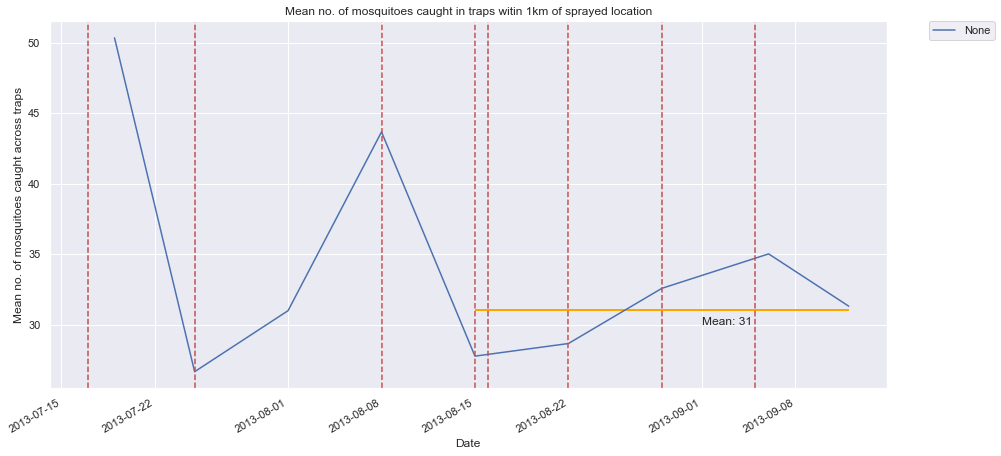

In [100]:
import datetime as dt
sns.set()
fig, ax = plt.subplots(1,1, figsize=(15,7.5))


spray_pivot.mean(axis=1).plot(
    ax=ax
)
ax.axvline(x=dt.datetime.strptime("2013-07-17", "%Y-%m-%d"), linestyle='--', c='r')
ax.axvline(x=dt.datetime.strptime("2013-07-25", "%Y-%m-%d"), linestyle='--', c='r')
ax.axvline(x=dt.datetime.strptime("2013-08-08", "%Y-%m-%d"), linestyle='--', c='r')
ax.axvline(x=dt.datetime.strptime("2013-08-15", "%Y-%m-%d"), linestyle='--', c='r')
ax.axvline(x=dt.datetime.strptime("2013-08-16", "%Y-%m-%d"), linestyle='--', c='r')
ax.axvline(x=dt.datetime.strptime("2013-08-22", "%Y-%m-%d"), linestyle='--', c='r')
ax.axvline(x=dt.datetime.strptime("2013-08-29", "%Y-%m-%d"), linestyle='--', c='r')
ax.axvline(x=dt.datetime.strptime("2013-09-05", "%Y-%m-%d"), linestyle='--', c='r')


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Mean no. of mosquitoes caught in traps witin 1km of sprayed location')
plt.ylabel('Mean no. of mosquitoes caught across traps')
plt.hlines(y = mean_num,
           xmin = '2013-08-15',
           xmax = '2013-09-12',
           color='orange',
           linestyle='-',
           linewidth=2
)
plt.annotate(f'Mean: {round(mean_num)}', ('2013-09-01', 30))

From the plot, we see that the mosquitoes numbers is high and fluctuates at the beginning of the spraying season. The fluctuation moderated towards the end of the spraying season in September around a mean of 30 after 15th August.

### Weather Dataset

> <font size = 3 color = "crimson"> Some plots could also be done for the weather features and number of mosquitoes or number of WNV occurrences by time/date.   </font>

#### Merge the filtered train and weather dataset for Modeling

In [101]:
train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10506 non-null  datetime64[ns]
 1   Species       10506 non-null  object        
 2   Trap          10506 non-null  object        
 3   Longitude     10506 non-null  float64       
 4   Latitude      10506 non-null  float64       
 5   NumMosquitos  10506 non-null  int64         
 6   WnvPresent    10506 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 574.7+ KB


In [102]:
weather_to_merge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1472 entries, 2007-05-01 to 2014-10-31
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tmax              1472 non-null   float64
 1   Tmin              1472 non-null   float64
 2   Tavg              1472 non-null   float64
 3   DewPoint          1472 non-null   float64
 4   WetBulb           1472 non-null   float64
 5   PrecipTotal       1472 non-null   float64
 6   Tmax_lag1         1471 non-null   float64
 7   Tmax_lag2         1470 non-null   float64
 8   Tmax_lag3         1469 non-null   float64
 9   Tmax_lag4         1468 non-null   float64
 10  Tmax_lag5         1467 non-null   float64
 11  Tmax_lag6         1466 non-null   float64
 12  Tmax_lag7         1465 non-null   float64
 13  Tmin_lag1         1471 non-null   float64
 14  Tmin_lag2         1470 non-null   float64
 15  Tmin_lag3         1469 non-null   float64
 16  Tmin_lag4         1468 n

In [103]:
# weather_to_merge['Date'].unique()

In [104]:
# train_filtered['Date'].unique()

In [105]:
# train_with_weather = train_filtered.merge(weather_to_merge, how='left', left_on='Date', right_on='Date')

In [106]:
# train_with_weather.info()

In [107]:
# train_with_weather.head()

#### Function to create a new column for week of year and month based on the Date

In [108]:
def convert_week_month(row, week=False):
    if week:
        return row['Date'].week
    else:
        return row['Date'].month

In [109]:
train_filtered['Date_week'] = train_filtered.apply(lambda row: convert_week_month(row, True), axis=1)
train_filtered['Date_month'] = train_filtered.apply(lambda row: convert_week_month(row), axis=1)

#### Drop duplicates using all the columns except for 'NumMosquitos' and 'WnvPresent' and sum up the number of mosquito and wnvpresent

In [110]:
train_filtered = train_filtered.groupby(
    [col for col in train_filtered.columns if col not in ['NumMosquitos', 'WnvPresent']]
).sum(
).reset_index()

#### Set the value of 'WnvPresent' to 1 if at least 1 of the duplicates has the presence of West Nile Virus

In [111]:
# Fix WnvPresent by resetting it = 1 if mosquitoes are infected
train_filtered['WnvPresent'] = train_filtered['WnvPresent'].map(lambda x: 1 if x > 0 else 0)

In [112]:
train_filtered.set_index('Date', inplace=True)
train_filtered.sort_index(ascending = True, inplace = True)
train_with_weather = train_filtered.merge(weather_to_merge, how='left', left_index=True, right_index=True)

In [113]:
train_with_weather.head()

Species  Trap  Longitude   Latitude  Date_week  \
Date                                                                        
2007-05-29           CULEX PIPIENS  T096 -87.677512  41.731922         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T002 -87.800991  41.954690         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T015 -87.824812  41.974089         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T048 -87.654224  41.867108         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T050 -87.694259  41.919343         22   

            Date_month  NumMosquitos  WnvPresent  Tmax  Tmin   Tavg  DewPoint  \
Date                                                                            
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   

            WetBulb  PrecipTotal  Tmax_lag1  Tmax_lag2  Tmax_lag3  Tmax_lag4  \
Date                                                                           
2007-05-29     65.5          0.0       77.5       75.0       67.5       68.0   
2007-05-29     65.5          0.0       77.5       75.0       67.5       68.0   
2007-05-29     65.5          0.0       77.5       75.0       67.5       68.0   
2007-05-29     65.5          0.0       77.5       75.0       67.5       68.0   
2007-05-29     65.5          0.0       77.5       75.0       67.5       68.0   

            Tmax_lag5  Tmax_lag6  Tmax_lag7  Tmin_lag1  Tmin_lag2  Tmin_lag3  \
Date                                                                           
2007-05-29       88.0       89.0       87.0       52.0       58.0       49.5   
2007-05-29       88.0       89.0       87.0       52.0       58.0       49.5   
2007-05-29       88.0       89.0       87.0       52.0       58.0       49.5   
2007-05-29       88.0       89.0       87.0       52.0       58.0       49.5   
2007-05-29       88.0       89.0       87.0       52.0       58.0       49.5   

            Tmin_lag4  Tmin_lag5  Tmin_lag6  Tmin_lag7  Tavg_lag1  Tavg_lag2  \
Date                                                                           
2007-05-29       56.5       64.5       63.0       57.5      64.75       66.5   
2007-05-29       56.5       64.5       63.0       57.5      64.75       66.5   
2007-05-29       56.5       64.5       63.0       57.5      64.75       66.5   
2007-05-29       56.5       64.5       63.0       57.5      64.75       66.5   
2007-05-29       56.5       64.5       63.0       57.5      64.75       66.5   

            Tavg_lag3  Tavg_lag4  Tavg_lag5  Tavg_lag6  Tavg_lag7  \
Date                                                                
2007-05-29       58.5      62.25      76.25       76.0      72.25   
2007-05-29       58.5      62.25      76.25       76.0      72.25   
2007-05-29       58.5      62.25      76.25       76.0      72.25   
2007-05-29       58.5      62.25      76.25       76.0      72.25   
2007-05-29       58.5      62.25      76.25       76.0      72.25   

            DewPoint_lag1  DewPoint_lag2  DewPoint_lag3  DewPoint_lag4  \
Date                                                                     
2007-05-29           48.0           48.0           55.0           45.0   
2007-05-29           48.0           48.0           55.0           45.0   
2007-05-29           48.0           48.0           55.0           45.0   
2007-05-29           48.0           48.0           55.0           45.0   
2007-05-29           48.0           48.0           55.0           45.0   

            DewPoint_lag5  DewPoint_lag6  DewPoint_lag7  WetBulb_lag1  \
Date                                                                    
2007-05-29           53.5           48.5           45.0          56.5   
2007-05-29    

In [114]:
# train_with_weather = train_with_weather.groupby(
#     [col for col in train_with_weather.columns if col not in ['NumMosquitos', 'WnvPresent']]
# ).sum(
# ).reset_index()

In [115]:
# # Fix WnvPresent by resetting it = 1 if mosquitoes are infected
# train_with_weather['WnvPresent'] = train_with_weather['WnvPresent'].map(lambda x: 1 if x > 0 else 0)

In [116]:
train_with_weather.head(20)

Species  Trap  Longitude   Latitude  Date_week  \
Date                                                                        
2007-05-29           CULEX PIPIENS  T096 -87.677512  41.731922         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T002 -87.800991  41.954690         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T015 -87.824812  41.974089         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T048 -87.654224  41.867108         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T050 -87.694259  41.919343         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T054 -87.632085  41.921965         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T086 -87.676709  41.688324         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T129 -87.611560  41.891126         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T143 -87.795585  41.999129         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T148 -87.687769  42.017430         22   
2007-05-29          CULEX RESTUANS  T002 -87.800991  41.954690         22   
2007-05-29          CULEX RESTUANS  T007 -87.769279  41.994991         22   
2007-05-29          CULEX RESTUANS  T015 -87.824812  41.974089         22   
2007-05-29          CULEX RESTUANS  T045 -87.666455  41.921600         22   
2007-05-29          CULEX RESTUANS  T046 -87.654491  41.891118         22   
2007-05-29          CULEX RESTUANS  T048 -87.654224  41.867108         22   
2007-05-29          CULEX RESTUANS  T049 -87.655232  41.896282         22   
2007-05-29          CULEX RESTUANS  T054 -87.632085  41.921965         22   
2007-05-29          CULEX RESTUANS  T086 -87.676709  41.688324         22   
2007-05-29          CULEX RESTUANS  T091 -87.648860  41.862292         22   

            Date_month  NumMosquitos  WnvPresent  Tmax  Tmin   Tavg  DewPoint  \
Date                                                                            
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             2           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             4           0  88.0  62.5  75.25      58.5   
2007-05-29           5             2           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             2           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             3           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   

            WetBulb  PrecipTotal  Tmax_lag1  Tmax_lag2  Tmax_lag3  Tmax_lag4  \
Date                                                                           
2007-05-29     65.5          0.0       77.5       75.0       67.5       68.0   
2007-05-29     65.5          0.0       77.5       75.0       67.5       68.0   
2007-05-29     65.5          0.0       77.5       75.0       67.5       68.0   
2007-05-29     65.5          0.0       77.5       75.0       67.5       68.0   
2007-05-29     65.5          0.0       77.5       75.0       67.5    

In [117]:
len(train_with_weather)

8475

In [118]:
train_with_weather.isna().sum()

Species             0
Trap                0
Longitude           0
Latitude            0
Date_week           0
Date_month          0
NumMosquitos        0
WnvPresent          0
Tmax                0
Tmin                0
Tavg                0
DewPoint            0
WetBulb             0
PrecipTotal         0
Tmax_lag1           0
Tmax_lag2           0
Tmax_lag3           0
Tmax_lag4           0
Tmax_lag5           0
Tmax_lag6           0
Tmax_lag7           0
Tmin_lag1           0
Tmin_lag2           0
Tmin_lag3           0
Tmin_lag4           0
Tmin_lag5           0
Tmin_lag6           0
Tmin_lag7           0
Tavg_lag1           0
Tavg_lag2           0
Tavg_lag3           0
Tavg_lag4           0
Tavg_lag5           0
Tavg_lag6           0
Tavg_lag7           0
DewPoint_lag1       0
DewPoint_lag2       0
DewPoint_lag3       0
DewPoint_lag4       0
DewPoint_lag5       0
DewPoint_lag6       0
DewPoint_lag7       0
WetBulb_lag1        0
WetBulb_lag2        0
WetBulb_lag3        0
WetBulb_la

In [119]:
train_with_weather.isin(['M']).sum()

Species             0
Trap                0
Longitude           0
Latitude            0
Date_week           0
Date_month          0
NumMosquitos        0
WnvPresent          0
Tmax                0
Tmin                0
Tavg                0
DewPoint            0
WetBulb             0
PrecipTotal         0
Tmax_lag1           0
Tmax_lag2           0
Tmax_lag3           0
Tmax_lag4           0
Tmax_lag5           0
Tmax_lag6           0
Tmax_lag7           0
Tmin_lag1           0
Tmin_lag2           0
Tmin_lag3           0
Tmin_lag4           0
Tmin_lag5           0
Tmin_lag6           0
Tmin_lag7           0
Tavg_lag1           0
Tavg_lag2           0
Tavg_lag3           0
Tavg_lag4           0
Tavg_lag5           0
Tavg_lag6           0
Tavg_lag7           0
DewPoint_lag1       0
DewPoint_lag2       0
DewPoint_lag3       0
DewPoint_lag4       0
DewPoint_lag5       0
DewPoint_lag6       0
DewPoint_lag7       0
WetBulb_lag1        0
WetBulb_lag2        0
WetBulb_lag3        0
WetBulb_la

In [120]:
train_with_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8475 entries, 2007-05-29 to 2013-09-26
Data columns (total 56 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Species           8475 non-null   object 
 1   Trap              8475 non-null   object 
 2   Longitude         8475 non-null   float64
 3   Latitude          8475 non-null   float64
 4   Date_week         8475 non-null   int64  
 5   Date_month        8475 non-null   int64  
 6   NumMosquitos      8475 non-null   int64  
 7   WnvPresent        8475 non-null   int64  
 8   Tmax              8475 non-null   float64
 9   Tmin              8475 non-null   float64
 10  Tavg              8475 non-null   float64
 11  DewPoint          8475 non-null   float64
 12  WetBulb           8475 non-null   float64
 13  PrecipTotal       8475 non-null   float64
 14  Tmax_lag1         8475 non-null   float64
 15  Tmax_lag2         8475 non-null   float64
 16  Tmax_lag3         8475 n

In [121]:
train_with_weather['Date_week'].unique()

array([22, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 24, 25])

### Export csv file for Model Evalution

#### Check on test dataset

In [122]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


#### Change date to datetime type

In [123]:
test['Date'] = pd.to_datetime(test['Date'])

#### Add new column for the month of the Date to the test dataset

In [124]:
test['Date_month'] = test.apply(lambda row: convert_week_month(row), axis=1)
test['Date_week'] = test.apply(lambda row: convert_week_month(row, True), axis=1)

In [125]:
test.head()

Id       Date                                            Address  \
0   1 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2   3 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
3   4 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
4   5 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2           CULEX PIPIENS     41   N OAK PARK AVE  T002   
3        CULEX SALINARIUS     41   N OAK PARK AVE  T002   
4         CULEX TERRITANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
2  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
3  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
4  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   Date_month  Date_week  
0           6         24  
1           6         24  
2           6         24  
3           6         24  
4           6         24

#### Select the features used for prediction

In [126]:
train_with_weather.head()

Species  Trap  Longitude   Latitude  Date_week  \
Date                                                                        
2007-05-29           CULEX PIPIENS  T096 -87.677512  41.731922         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T002 -87.800991  41.954690         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T015 -87.824812  41.974089         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T048 -87.654224  41.867108         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T050 -87.694259  41.919343         22   

            Date_month  NumMosquitos  WnvPresent  Tmax  Tmin   Tavg  DewPoint  \
Date                                                                            
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   

            WetBulb  PrecipTotal  Tmax_lag1  Tmax_lag2  Tmax_lag3  Tmax_lag4  \
Date                                                                           
2007-05-29     65.5          0.0       77.5       75.0       67.5       68.0   
2007-05-29     65.5          0.0       77.5       75.0       67.5       68.0   
2007-05-29     65.5          0.0       77.5       75.0       67.5       68.0   
2007-05-29     65.5          0.0       77.5       75.0       67.5       68.0   
2007-05-29     65.5          0.0       77.5       75.0       67.5       68.0   

            Tmax_lag5  Tmax_lag6  Tmax_lag7  Tmin_lag1  Tmin_lag2  Tmin_lag3  \
Date                                                                           
2007-05-29       88.0       89.0       87.0       52.0       58.0       49.5   
2007-05-29       88.0       89.0       87.0       52.0       58.0       49.5   
2007-05-29       88.0       89.0       87.0       52.0       58.0       49.5   
2007-05-29       88.0       89.0       87.0       52.0       58.0       49.5   
2007-05-29       88.0       89.0       87.0       52.0       58.0       49.5   

            Tmin_lag4  Tmin_lag5  Tmin_lag6  Tmin_lag7  Tavg_lag1  Tavg_lag2  \
Date                                                                           
2007-05-29       56.5       64.5       63.0       57.5      64.75       66.5   
2007-05-29       56.5       64.5       63.0       57.5      64.75       66.5   
2007-05-29       56.5       64.5       63.0       57.5      64.75       66.5   
2007-05-29       56.5       64.5       63.0       57.5      64.75       66.5   
2007-05-29       56.5       64.5       63.0       57.5      64.75       66.5   

            Tavg_lag3  Tavg_lag4  Tavg_lag5  Tavg_lag6  Tavg_lag7  \
Date                                                                
2007-05-29       58.5      62.25      76.25       76.0      72.25   
2007-05-29       58.5      62.25      76.25       76.0      72.25   
2007-05-29       58.5      62.25      76.25       76.0      72.25   
2007-05-29       58.5      62.25      76.25       76.0      72.25   
2007-05-29       58.5      62.25      76.25       76.0      72.25   

            DewPoint_lag1  DewPoint_lag2  DewPoint_lag3  DewPoint_lag4  \
Date                                                                     
2007-05-29           48.0           48.0           55.0           45.0   
2007-05-29           48.0           48.0           55.0           45.0   
2007-05-29           48.0           48.0           55.0           45.0   
2007-05-29           48.0           48.0           55.0           45.0   
2007-05-29           48.0           48.0           55.0           45.0   

            DewPoint_lag5  DewPoint_lag6  DewPoint_lag7  WetBulb_lag1  \
Date                                                                    
2007-05-29           53.5           48.5           45.0          56.5   
2007-05-29    

In [127]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      116293 non-null  int64         
 1   Date                    116293 non-null  datetime64[ns]
 2   Address                 116293 non-null  object        
 3   Species                 116293 non-null  object        
 4   Block                   116293 non-null  int64         
 5   Street                  116293 non-null  object        
 6   Trap                    116293 non-null  object        
 7   AddressNumberAndStreet  116293 non-null  object        
 8   Latitude                116293 non-null  float64       
 9   Longitude               116293 non-null  float64       
 10  AddressAccuracy         116293 non-null  int64         
 11  Date_month              116293 non-null  int64         
 12  Date_week               116293

#### Merge test dataset wth weather and get only the useful columns for test dataset

In [128]:
test.set_index('Date', inplace=True)
test.sort_index(ascending = True, inplace = True)
test_with_weather = test.merge(weather_to_merge, how='left', left_index=True, right_index=True)

In [129]:
# test_with_weather = test.merge(weather_to_merge, how='left', left_on='Date', right_on='Date')

In [130]:
test_with_weather.head()

Id                                            Address  \
Date                                                                
2008-06-11   1  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2008-06-11   2  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2008-06-11   3  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2008-06-11   4  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2008-06-11   5  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                           Species  Block           Street  Trap  \
Date                                                               
2008-06-11  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
2008-06-11          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2008-06-11           CULEX PIPIENS     41   N OAK PARK AVE  T002   
2008-06-11        CULEX SALINARIUS     41   N OAK PARK AVE  T002   
2008-06-11         CULEX TERRITANS     41   N OAK PARK AVE  T002   

                       AddressNumberAndStreet  Latitude  Longitude  \
Date                                                                 
2008-06-11  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991   
2008-06-11  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991   
2008-06-11  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991   
2008-06-11  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991   
2008-06-11  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991   

            AddressAccuracy  Date_month  Date_week  Tmax  Tmin   Tavg  \
Date                                                                    
2008-06-11                9           6         24  86.0  63.5  74.75   
2008-06-11                9           6         24  86.0  63.5  74.75   
2008-06-11                9           6         24  86.0  63.5  74.75   
2008-06-11                9           6         24  86.0  63.5  74.75   
2008-06-11                9           6         24  86.0  63.5  74.75   

            DewPoint  WetBulb  PrecipTotal  Tmax_lag1  Tmax_lag2  Tmax_lag3  \
Date                                                                          
2008-06-11      55.5     64.0          0.0       79.5       74.0       86.0   
2008-06-11      55.5     64.0          0.0       79.5       74.0       86.0   
2008-06-11      55.5     64.0          0.0       79.5       74.0       86.0   
2008-06-11      55.5     64.0          0.0       79.5       74.0       86.0   
2008-06-11      55.5     64.0          0.0       79.5       74.0       86.0   

            Tmax_lag4  Tmax_lag5  Tmax_lag6  Tmax_lag7  Tmin_lag1  Tmin_lag2  \
Date                                                                           
2008-06-11       84.5       86.5       87.5       78.0       59.5       65.0   
2008-06-11       84.5       86.5       87.5       78.0       59.5       65.0   
2008-06-11       84.5       86.5       87.5       78.0       59.5       65.0   
2008-06-11       84.5       86.5       87.5       78.0       59.5       65.0   
2008-06-11       84.5       86.5       87.5       78.0       59.5       65.0   

            Tmin_lag3  Tmin_lag4  Tmin_lag5  Tmin_lag6  Tmin_lag7  Tavg_lag1  \
Date                                                                           
2008-06-11       64.5       70.5       73.0       64.0       56.5       69.5   
2008-06-11       64.5       70.5       73.0       64.0       56.5       69.5   
2008-06-11       64.5       70.5       73.0       64.0       56.5       69.5   
2008-06-11       64.5       70.5       73.0       64.0       56.5       69.5   
2008-06-11       64.5       70.5       73.0       64.0       56.5       69.5   

            Tavg_lag2  Tavg_lag3  Tavg_lag4  Tavg_lag5  Tavg_lag6  Tavg_lag7  \
Date                                                                           
2008-06-11       69.5      75.25       77.5      79.75      75.75      67.25   
2008-06-11       69.5      75.25       77.5      79.75      75.75      67.25   
2008-06-11       69.5      75.25       77.5      79.

In [131]:
# test_cols_filtered = ['Id', 'Species', 'Trap', 'Longitude', 'Latitude', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'PrecipTotal', 'month', 'week_of_year']
# # cols_prediction = ['Species', 'Trap', 'Longitude', 'Latitude', 'month']
# nominal_cols = ['Species', 'Trap', 'month']
# continuous_cols = [col for col in cols_prediction if col not in nominal_cols]
test_cols_rm = ['Address', 'Street', 'Block', 'AddressNumberAndStreet', 'AddressAccuracy']
test_cols_filtered = [col for col in test_with_weather.columns if col not in test_cols_rm]

In [132]:
test_with_weather = test_with_weather[test_cols_filtered]

In [133]:
test_with_weather.head()

Id                 Species  Trap  Latitude  Longitude  Date_month  \
Date                                                                            
2008-06-11   1  CULEX PIPIENS/RESTUANS  T002  41.95469 -87.800991           6   
2008-06-11   2          CULEX RESTUANS  T002  41.95469 -87.800991           6   
2008-06-11   3           CULEX PIPIENS  T002  41.95469 -87.800991           6   
2008-06-11   4        CULEX SALINARIUS  T002  41.95469 -87.800991           6   
2008-06-11   5         CULEX TERRITANS  T002  41.95469 -87.800991           6   

            Date_week  Tmax  Tmin   Tavg  DewPoint  WetBulb  PrecipTotal  \
Date                                                                       
2008-06-11         24  86.0  63.5  74.75      55.5     64.0          0.0   
2008-06-11         24  86.0  63.5  74.75      55.5     64.0          0.0   
2008-06-11         24  86.0  63.5  74.75      55.5     64.0          0.0   
2008-06-11         24  86.0  63.5  74.75      55.5     64.0          0.0   
2008-06-11         24  86.0  63.5  74.75      55.5     64.0          0.0   

            Tmax_lag1  Tmax_lag2  Tmax_lag3  Tmax_lag4  Tmax_lag5  Tmax_lag6  \
Date                                                                           
2008-06-11       79.5       74.0       86.0       84.5       86.5       87.5   
2008-06-11       79.5       74.0       86.0       84.5       86.5       87.5   
2008-06-11       79.5       74.0       86.0       84.5       86.5       87.5   
2008-06-11       79.5       74.0       86.0       84.5       86.5       87.5   
2008-06-11       79.5       74.0       86.0       84.5       86.5       87.5   

            Tmax_lag7  Tmin_lag1  Tmin_lag2  Tmin_lag3  Tmin_lag4  Tmin_lag5  \
Date                                                                           
2008-06-11       78.0       59.5       65.0       64.5       70.5       73.0   
2008-06-11       78.0       59.5       65.0       64.5       70.5       73.0   
2008-06-11       78.0       59.5       65.0       64.5       70.5       73.0   
2008-06-11       78.0       59.5       65.0       64.5       70.5       73.0   
2008-06-11       78.0       59.5       65.0       64.5       70.5       73.0   

            Tmin_lag6  Tmin_lag7  Tavg_lag1  Tavg_lag2  Tavg_lag3  Tavg_lag4  \
Date                                                                           
2008-06-11       64.0       56.5       69.5       69.5      75.25       77.5   
2008-06-11       64.0       56.5       69.5       69.5      75.25       77.5   
2008-06-11       64.0       56.5       69.5       69.5      75.25       77.5   
2008-06-11       64.0       56.5       69.5       69.5      75.25       77.5   
2008-06-11       64.0       56.5       69.5       69.5      75.25       77.5   

            Tavg_lag5  Tavg_lag6  Tavg_lag7  DewPoint_lag1  DewPoint_lag2  \
Date                                                                        
2008-06-11      79.75      75.75      67.25           56.0           64.0   
2008-06-11      79.75      75.75      67.25           56.0           64.0   
2008-06-11      79.75      75.75      67.25           56.0           64.0   
2008-06-11      79.75      75.75      67.25           56.0           64.0   
2008-06-11      79.75      75.75      67.25           56.0           64.0   

            DewPoint_lag3  DewPoint_lag4  DewPoint_lag5  DewPoint_lag6  \
Date                                                                     
2008-06-11           68.5           71.0           68.5           68.5   
2008-06-11           68.5           71.0           68.5           68.5   
2008-06-11           68.5           71.0           68.5           68.5   
2008-06-11           68.5           71.0           68.5           68.5   
2008-06-11           68.5           71.0           68.5           68.5   

            DewPoint_lag7  WetBulb_lag1  WetBulb_lag2  WetBulb_lag3  \
Date                                                                  
2008-06-11           60.0  

In [134]:
# def lag_features(df, index, start, end, features_list):

#     if type(features_list) != list:
#         raise Exception("Please include a list of features")
#     else:
# #         df.set_index
#         df.set_index(index, inplace=True)
#         df.sort_index(ascending = True, inplace = True)
#         for feature in features_list:
#             for day in range(start, end+1):
#                 df[f'{feature}_lag{day}'] = df[feature].shift(day)
#     return df

In [135]:
train_with_weather.head()

Species  Trap  Longitude   Latitude  Date_week  \
Date                                                                        
2007-05-29           CULEX PIPIENS  T096 -87.677512  41.731922         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T002 -87.800991  41.954690         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T015 -87.824812  41.974089         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T048 -87.654224  41.867108         22   
2007-05-29  CULEX PIPIENS/RESTUANS  T050 -87.694259  41.919343         22   

            Date_month  NumMosquitos  WnvPresent  Tmax  Tmin   Tavg  DewPoint  \
Date                                                                            
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   
2007-05-29           5             1           0  88.0  62.5  75.25      58.5   

            WetBulb  PrecipTotal  Tmax_lag1  Tmax_lag2  Tmax_lag3  Tmax_lag4  \
Date                                                                           
2007-05-29     65.5          0.0       77.5       75.0       67.5       68.0   
2007-05-29     65.5          0.0       77.5       75.0       67.5       68.0   
2007-05-29     65.5          0.0       77.5       75.0       67.5       68.0   
2007-05-29     65.5          0.0       77.5       75.0       67.5       68.0   
2007-05-29     65.5          0.0       77.5       75.0       67.5       68.0   

            Tmax_lag5  Tmax_lag6  Tmax_lag7  Tmin_lag1  Tmin_lag2  Tmin_lag3  \
Date                                                                           
2007-05-29       88.0       89.0       87.0       52.0       58.0       49.5   
2007-05-29       88.0       89.0       87.0       52.0       58.0       49.5   
2007-05-29       88.0       89.0       87.0       52.0       58.0       49.5   
2007-05-29       88.0       89.0       87.0       52.0       58.0       49.5   
2007-05-29       88.0       89.0       87.0       52.0       58.0       49.5   

            Tmin_lag4  Tmin_lag5  Tmin_lag6  Tmin_lag7  Tavg_lag1  Tavg_lag2  \
Date                                                                           
2007-05-29       56.5       64.5       63.0       57.5      64.75       66.5   
2007-05-29       56.5       64.5       63.0       57.5      64.75       66.5   
2007-05-29       56.5       64.5       63.0       57.5      64.75       66.5   
2007-05-29       56.5       64.5       63.0       57.5      64.75       66.5   
2007-05-29       56.5       64.5       63.0       57.5      64.75       66.5   

            Tavg_lag3  Tavg_lag4  Tavg_lag5  Tavg_lag6  Tavg_lag7  \
Date                                                                
2007-05-29       58.5      62.25      76.25       76.0      72.25   
2007-05-29       58.5      62.25      76.25       76.0      72.25   
2007-05-29       58.5      62.25      76.25       76.0      72.25   
2007-05-29       58.5      62.25      76.25       76.0      72.25   
2007-05-29       58.5      62.25      76.25       76.0      72.25   

            DewPoint_lag1  DewPoint_lag2  DewPoint_lag3  DewPoint_lag4  \
Date                                                                     
2007-05-29           48.0           48.0           55.0           45.0   
2007-05-29           48.0           48.0           55.0           45.0   
2007-05-29           48.0           48.0           55.0           45.0   
2007-05-29           48.0           48.0           55.0           45.0   
2007-05-29           48.0           48.0           55.0           45.0   

            DewPoint_lag5  DewPoint_lag6  DewPoint_lag7  WetBulb_lag1  \
Date                                                                    
2007-05-29           53.5           48.5           45.0          56.5   
2007-05-29    

In [136]:
# train_with_weather = lag_features(train_with_weather, 'Date', 1, 7, ['Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'PrecipTotal'])

In [137]:
# col_no_date = [col for col in train_with_weather.columns if col != 'Date']

In [138]:
# train_with_weather = train_with_weather[col_no_date]

In [139]:
# train_with_weather.head()

In [140]:
# test_with_weather = lag_features(test_with_weather, 'Date', 1, 7, ['Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'PrecipTotal'])

In [141]:
# test_with_weather.head()

In [142]:
# train_with_weather.to_csv('../data/train_filtered.csv')
# test_with_weather.to_csv('../data/test_filtered.csv')
train_with_weather.to_csv('../data/train_filtered_clean.csv', index=False)
test_with_weather.to_csv('../data/test_filtered_clean.csv', index=False)

## Summary